IMPORTING IMPORTANT PACKAGES

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Transformation function

In [74]:
def transform( x, mean, standard_dev):
        """Apply feature scaling (normalization)."""
        return (x - mean) / standard_dev

Normalization function

In [75]:
def normalization( X):
        """Compute mean and standard deviation for feature normalization."""
        m = len(X)
        mean = np.mean(X, axis=0)
        standard_dev = np.std(X, axis=0)
        
        new_array =transform(X, mean, standard_dev)
        return new_array, mean, standard_dev

One hot encoding function

In [76]:
def oneencoding( y, numberofclasses):
        """One-hot encode the labels."""
        m = len(y)
        y_1 = np.zeros((m, numberofclasses))
        for i in range(m):
            y_1[i][y[i]] = 1
        return y_1

SIGMOID FUNCTION OR SQUEEZING FUNCTION

In [77]:
def sigmoid(x, w, b):
        """Compute the sigmoid function."""
        z = np.dot(w, x) + b
        return 1.0 / (1.0 + np.exp(-z))

Cost function

In [78]:
def costfunction(x, y, w, b):
        """Compute the cost function for logistic regression."""
        m = x.shape[1]
        fwb = sigmoid(x, w, b)
        J = -np.sum(y * np.log(fwb) + (1 - y) * np.log(1 - fwb)) / m
        return J

Function for gradient calculation

In [79]:
def gradient( x, y, w, b):
        """Compute the gradients for optimization."""
        m = x.shape[1]
        fwb = sigmoid(x, w, b)
        error = fwb - y

        dj_dw = np.dot(error, x.T) / m
        dj_db = np.sum(error, axis=1, keepdims=True) / m

        return dj_dw, dj_db

LOGISTIC REGRESSION FUNCTION

In [80]:
def logisticregression( data_arr, alpha, iterations, numberclass):
        """Train the logistic regression model."""
        x = data_arr[:, 1:]  # Features
        y = data_arr[:, 0].astype(int)  # Labels

        # One-hot encode labels and transpose
        y_1 = oneencoding(y, numberclass).T

        # Normalize features
        x, mean, standard_dev = normalization(x)

        x = x.T  # Shape: (features, samples)
        w = np.zeros((y_1.shape[0], x.shape[0]))  # Shape: (classes, features)
        b = np.zeros((y_1.shape[0], 1))  # Bias for each class

        J_hist, w_hist, b_hist = [], [], []

        for i in range(iterations):
            dj_dw, dj_db = gradient(x, y_1, w, b)
            w -= alpha * dj_dw
            b -= alpha * dj_db
            J = costfunction(x, y_1, w, b)

            if i % 10 == 0:
                print(f"{i}th iteration completed")

            J_hist.append(J)
            w_hist.append(w.copy())
            b_hist.append(b.copy())

        return w, b, J_hist, mean, standard_dev

PREDICTION FUNCTION

In [ ]:
def prediction(testdata, w, b, mean, standard_dev):
        """Predict the class label for new data."""
        x = testdata  # Test data should already be without labels
        x = transform(x, mean, standard_dev) 
        x = x.T  # Shape: (features, samples)

        y_pred = sigmoid(x, w, b)
        y_pred = (y_pred >= 0.5).astype(int)

        return y_pred

In [82]:
df=pd.read_csv(r"C:\Users\Mridul Mishra\Downloads\framingham.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [83]:
X = df[['male', 'age', 'education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']].values #X is now input array
Y = df['TenYearCHD'].values # Y is taking output values

In [84]:
#X_norm,mean,std_dev = normalization(X)
data_arr = np.column_stack((Y, X))

In [85]:
alpha = 0.01         # Learning rate
iterations = 500     # Number of iterations
numberclass = 2      # Binary classification (0 or 1)

w, b, J_hist, mean, standard_dev = logisticregression(data_arr, alpha, iterations, numberclass)

0th iteration completed
10th iteration completed
20th iteration completed
30th iteration completed
40th iteration completed
50th iteration completed
60th iteration completed
70th iteration completed
80th iteration completed
90th iteration completed
100th iteration completed
110th iteration completed
120th iteration completed
130th iteration completed
140th iteration completed
150th iteration completed
160th iteration completed
170th iteration completed
180th iteration completed
190th iteration completed
200th iteration completed
210th iteration completed
220th iteration completed
230th iteration completed
240th iteration completed
250th iteration completed
260th iteration completed
270th iteration completed
280th iteration completed
290th iteration completed
300th iteration completed
310th iteration completed
320th iteration completed
330th iteration completed
340th iteration completed
350th iteration completed
360th iteration completed
370th iteration completed
380th iteration complet

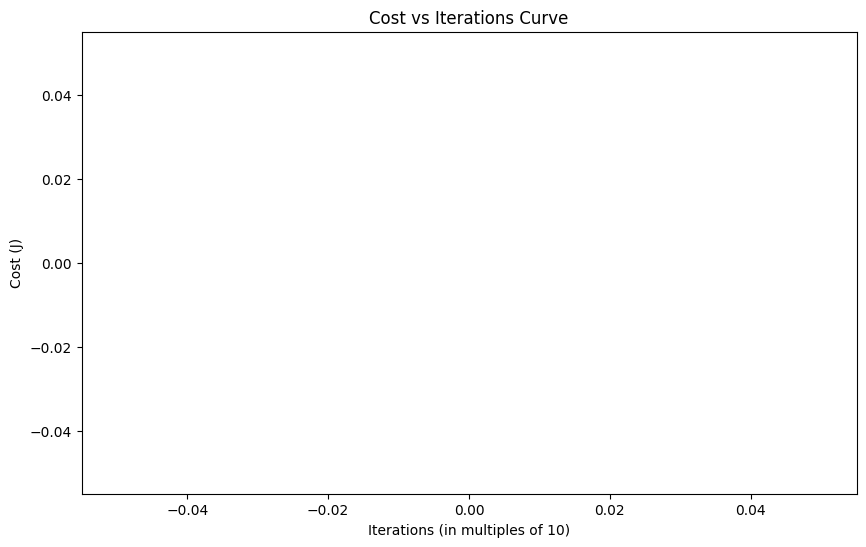

In [92]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(J_hist)), J_hist, marker='o', linestyle='-', color='b')
plt.xlabel("Iterations (in multiples of 10)")
plt.ylabel("Cost (J)")
plt.title("Cost vs Iterations Curve")
plt.show()


In [93]:

random_input = np.array([[1, 45, 2, 0, 10, 0, 0, 1, 0, 200, 130, 80, 25, 70, 100]])

# Predicting the output
predicted_Y = prediction(random_input, w, b, mean, standard_dev)
print("Predicted TenYearCHD:", predicted_Y[0][0])


Predicted TenYearCHD: 0
